In [1]:
# Dependencies and Setup
import pandas as pd
# import demoji
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3
import scipy.stats as stats

# File to Load
chart_path = "spotify_charts.csv"

# Read Chart Data File and store into Pandas DataFrames
chart_data = pd.read_csv(chart_path, encoding='utf-8')

In [2]:
#remove global from the regions column
global_df = chart_data[chart_data["region"] == "Global"]

In [3]:
regional_df = chart_data[chart_data["region"] != "Global"]

In [4]:
len(regional_df['region'].unique())

68

In [5]:
#count countries
len(global_df['region'].unique())

1

In [6]:
#create new df based on region
top_countries = regional_df.groupby(['region'])[['total streams','artist']].sum()

#sort df to find top streaming countries
sorted_countries = top_countries.sort_values('total streams', ascending = False)
sorted_countries

/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_35315/206594777.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_countries = regional_df.groupby(['region'])[['total streams','artist']].sum()


,total streams
region,
United States,1.421321e+11
Brazil,5.586668e+10
Mexico,4.559591e+10
Germany,3.995627e+10
United Kingdom,3.640880e+10
...,...
Nicaragua,2.272293e+08
Estonia,1.934318e+08
Bulgaria,1.619776e+08


In [7]:
# variable for top ten countries
top_ten = sorted_countries.head(10)
top_ten

,total streams
region,
United States,1.421321e+11
Brazil,5.586668e+10
Mexico,4.559591e+10
Germany,3.995627e+10
United Kingdom,3.640880e+10
Spain,2.706220e+10
Italy,2.559113e+10
France,2.386987e+10
Australia,2.012821e+10


In [8]:
type(top_ten)

pandas.core.frame.DataFrame

In [9]:
top_ten.index

Index(['United States', 'Brazil', 'Mexico', 'Germany', 'United Kingdom',
       'Spain', 'Italy', 'France', 'Australia', 'Argentina'],
      dtype='object', name='region')

In [10]:
sorted_countries.sum()

total streams    6.837107e+11
dtype: float64

In [11]:
# divided the total streams for each country by the global total for entire time period, error is here 
top_ten_decimal = sorted_countries['total streams'].div(6.837107e+11)
top_ten_decimal

region
United States     0.207883
Brazil            0.081711
Mexico            0.066689
Germany           0.058440
United Kingdom    0.053252
                    ...   
Nicaragua         0.000332
Estonia           0.000283
Bulgaria          0.000237
South Korea       0.000234
Luxembourg        0.000022
Name: total streams, Length: 68, dtype: float64

In [12]:
top_ten_decimal.sum()

1.0000000696157014

In [13]:
type(top_ten_decimal)

pandas.core.series.Series

In [14]:
top_expected = top_ten_decimal.multiply(1.479857e+09)

In [15]:
type(top_ten_decimal)

pandas.core.series.Series

In [16]:
top_ten_per= pd.Series(["{0:.2f}%".format(val * 100) for val in top_ten_decimal], index = top_ten_decimal.index)
top_ten_per

region
United States     20.79%
Brazil             8.17%
Mexico             6.67%
Germany            5.84%
United Kingdom     5.33%
                   ...  
Nicaragua          0.03%
Estonia            0.03%
Bulgaria           0.02%
South Korea        0.02%
Luxembourg         0.00%
Length: 68, dtype: object

In [17]:
#create new df based on region
global_total = global_df.groupby(['region'])[['total streams','artist']].sum()
global_total

/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_35315/2180929886.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  global_total = global_df.groupby(['region'])[['total streams','artist']].sum()


,total streams
region,
Global,4.393043e+11


In [18]:
print(global_total.dtypes)

total streams    float64
dtype: object


<AxesSubplot: xlabel='region'>

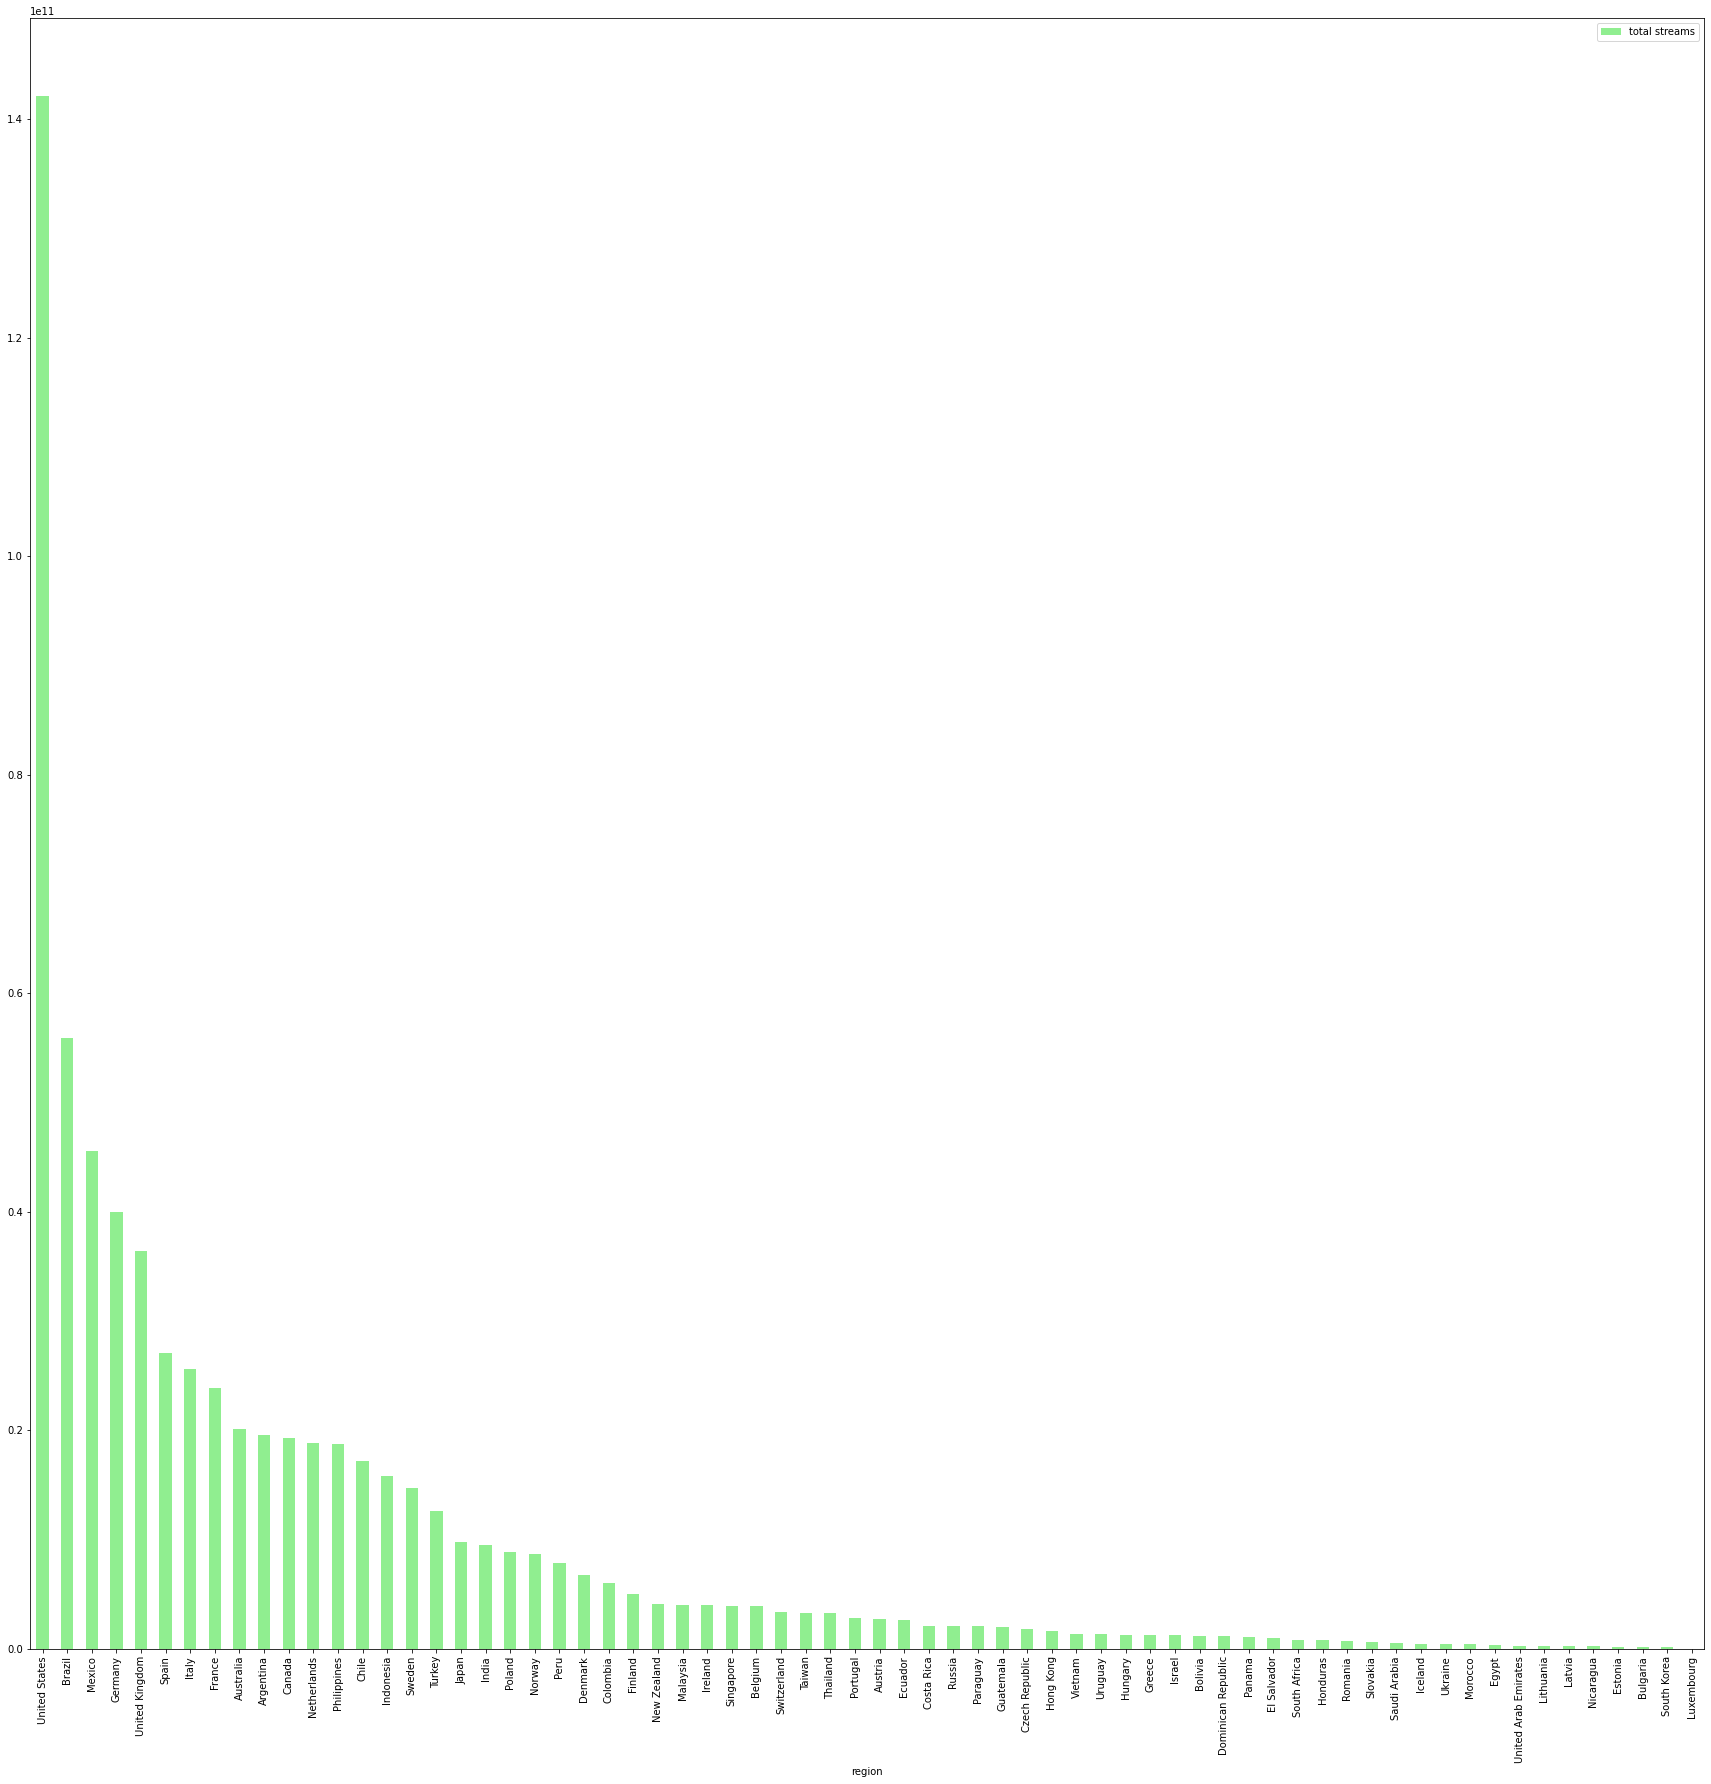

In [19]:
#create bar plot to show all countries streams 
sorted_countries_plot = sorted_countries.plot.bar(y='total streams', figsize =(30,30), width=.5, alpha=1, align="center", color = "lightgreen")
sorted_countries_plot

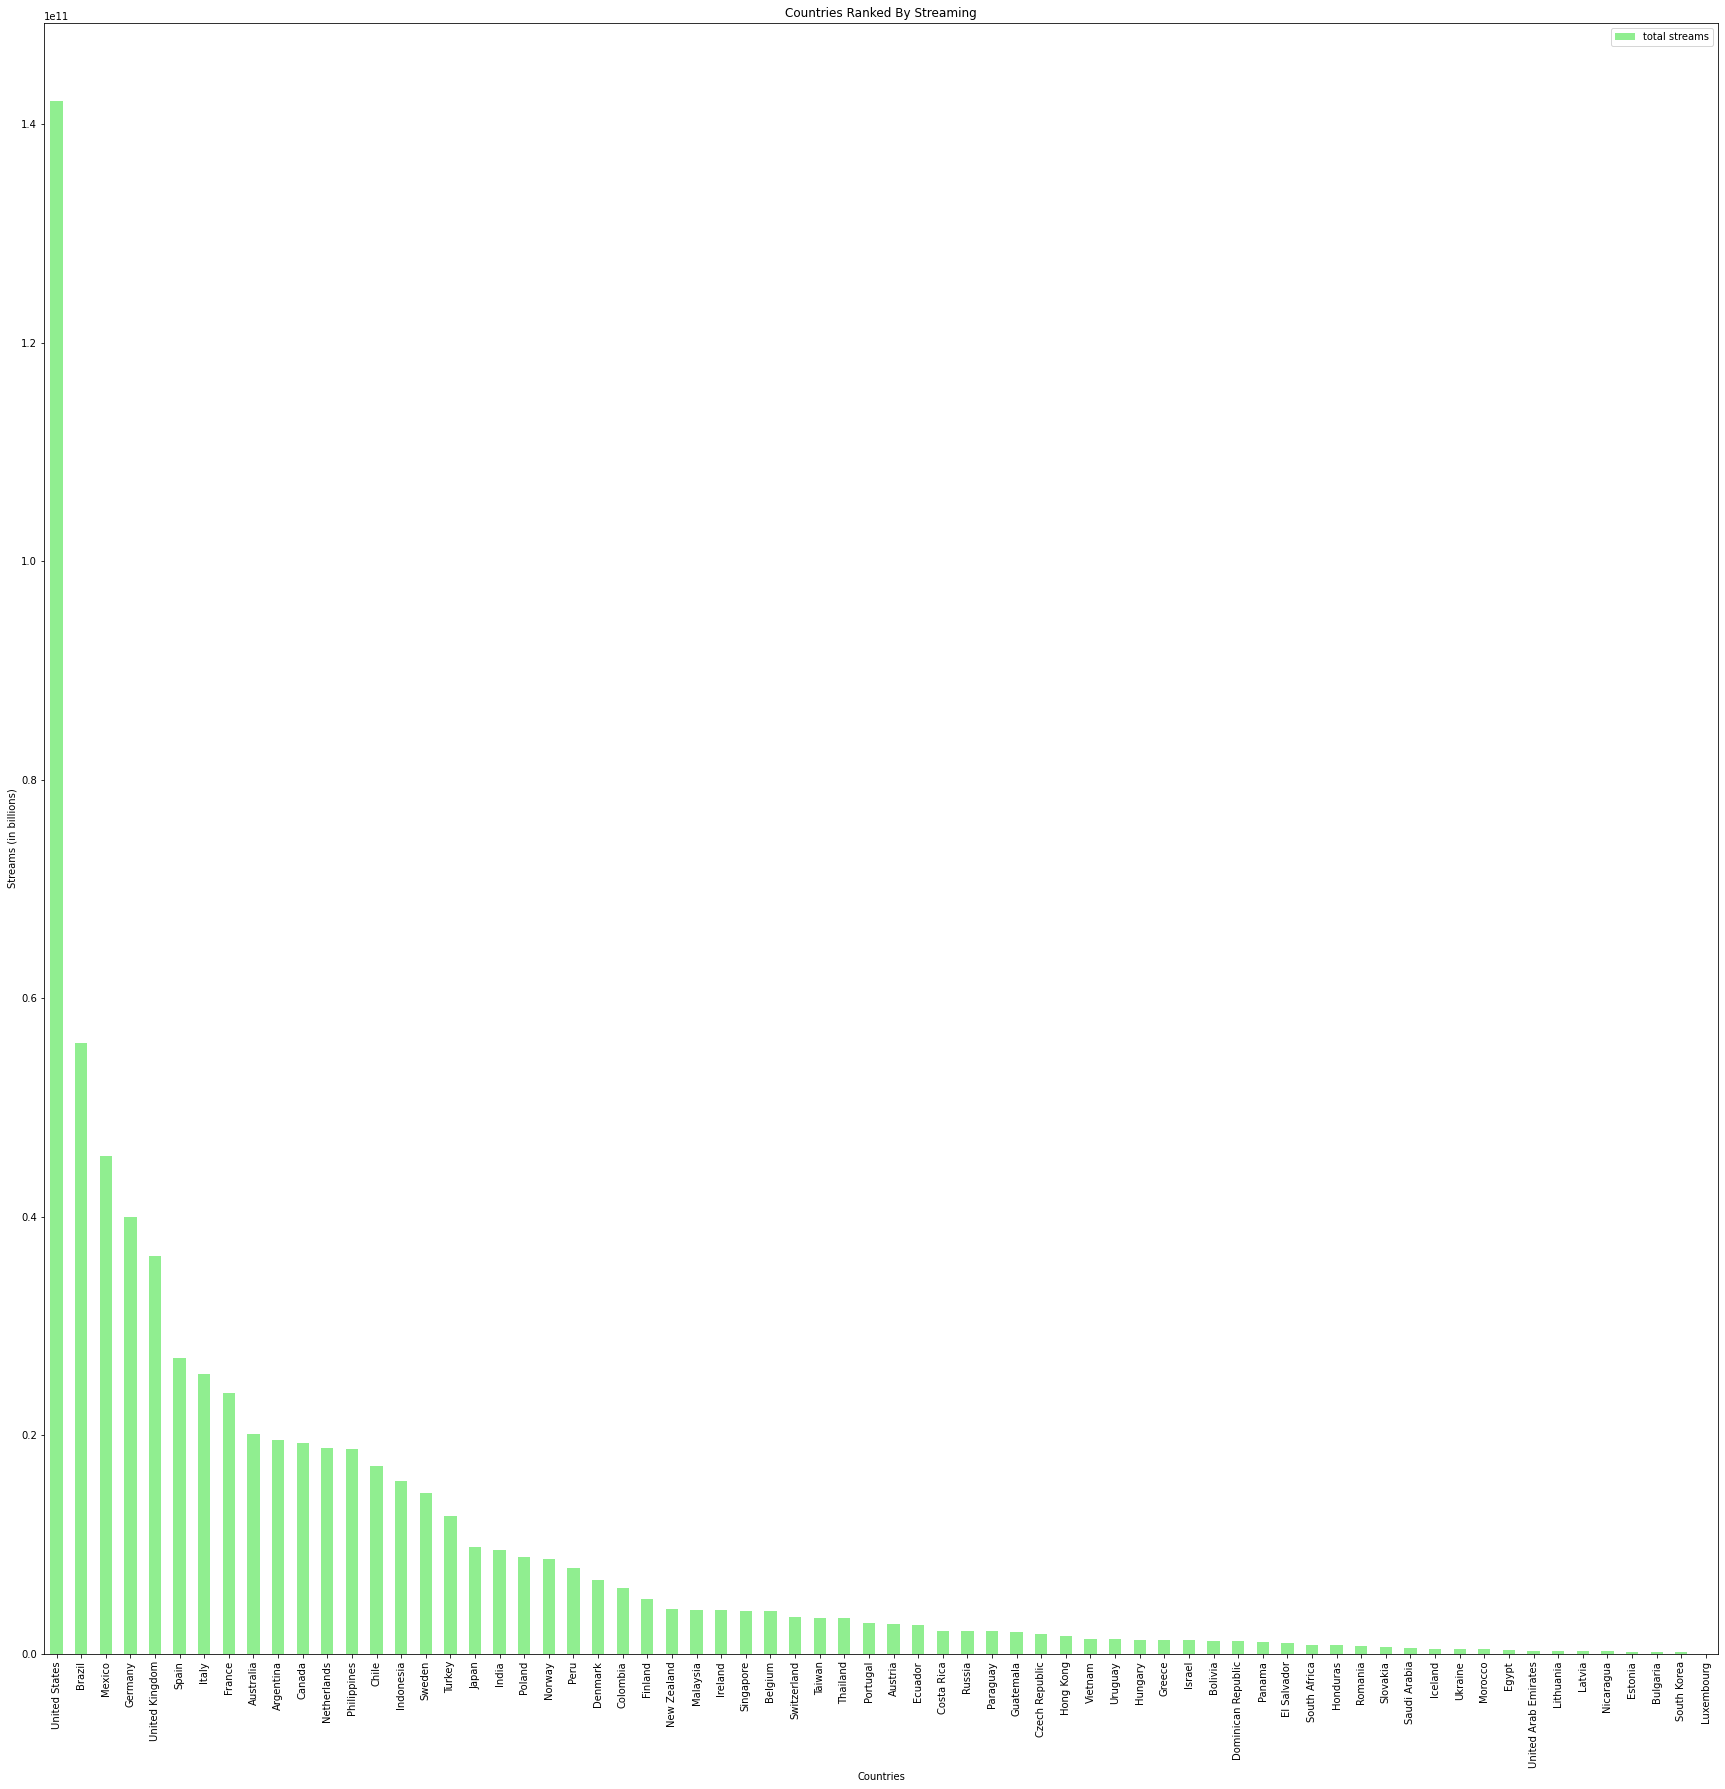

In [20]:
#create bar plot to show all countries streams 
sorted_countries_plot = sorted_countries.plot.bar(y='total streams', figsize =(30,30), width=.5, alpha=1, align="center", color = "lightgreen")

#adds title to bar chart  
plt.title("Countries Ranked By Streaming")

#label xaxis
plt.xlabel("Countries")

#lable yaxis
plt.ylabel("Streams (in billions)")

#rotate xticks to fit lables
plt.xticks(rotation = 90)

#export chart to pngs
plt.savefig("Countries_By_Streaming.png")

#show graph 
plt.show() 

In [21]:
#Find total streams for US
us = chart_data.loc[chart_data["region"] == "United States"]

#sum total streams
us_streaming = us["total streams"].sum()

#Find total streams overall
overall = chart_data.loc[chart_data["region"] == "Global"]

#Sum total streams overall
overall_streaming = overall["total streams"].sum()

#Calcuate percent of streams that are from US
us_percent_streaming = (us_streaming/overall_streaming) * 100

#print streaming percentage
us_percent_streaming

print(f"The U.S. market makes up {us_percent_streaming}% of the total global Spotify streams from 2017-2021.")

The U.S. market makes up 32.35390255351552% of the total global Spotify streams from 2017-2021.


In [22]:
#create df for all songs from 2017
df_2017_all = chart_data[(chart_data["date"] == 2017)]

#sort df by total streams to find top ten
all_songs_2017 = df_2017_all.sort_values('total streams', ascending = False)

all_songs_2017

,date,title,artist,region,total streams
48188,2017,Shape of You,Ed Sheeran,Global,1.479857e+09
12958,2017,Despacito - Remix,"Luis Fonsi, Daddy Yankee, Justin Bieber",Global,9.085726e+08
12901,2017,Despacito (Featuring Daddy Yankee),Luis Fonsi,Global,7.391564e+08
50763,2017,Something Just Like This,"The Chainsmokers, Coldplay",Global,6.864717e+08
20887,2017,HUMBLE.,Kendrick Lamar,Global,6.504118e+08
...,...,...,...,...,...
36319,2017,Muy Personal (feat. J Balvin),Yandel,Panama,1.001000e+03
9634,2017,Chantaje (feat. Maluma),Shakira,Luxembourg,1.001000e+03
35602,2017,Mit Mondjak Még,Kowalsky Meg A Vega,Hungary,1.001000e+03
4270,2017,"Baby, You Make Me Crazy",Sam Smith,Hungary,1.001000e+03


In [23]:
#create df for all 
shape_of_you = all_songs_2017[(all_songs_2017["title"] == "Shape of You") & (chart_data["region"] != "Global")]
shape_of_you

/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_35315/3683089355.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  shape_of_you = all_songs_2017[(all_songs_2017["title"] == "Shape of You") & (chart_data["region"] != "Global")]


,date,title,artist,region,total streams
48223,2017,Shape of You,Ed Sheeran,United States,278916058.0
48222,2017,Shape of You,Ed Sheeran,United Kingdom,130658891.0
48187,2017,Shape of You,Ed Sheeran,Germany,96505235.0
48173,2017,Shape of You,Ed Sheeran,Brazil,95996545.0
48203,2017,Shape of You,Ed Sheeran,Mexico,86326454.0
48217,2017,Shape of You,Ed Sheeran,Sweden,63184448.0
48216,2017,Shape of You,Ed Sheeran,Spain,60057135.0
48211,2017,Shape of You,Ed Sheeran,Philippines,57245668.0
48204,2017,Shape of You,Ed Sheeran,Netherlands,55204354.0
48169,2017,Shape of You,Ed Sheeran,Australia,51174073.0


In [24]:
shape_top = shape_of_you.head(10)
shape_top

,date,title,artist,region,total streams
48223,2017,Shape of You,Ed Sheeran,United States,278916058.0
48222,2017,Shape of You,Ed Sheeran,United Kingdom,130658891.0
48187,2017,Shape of You,Ed Sheeran,Germany,96505235.0
48173,2017,Shape of You,Ed Sheeran,Brazil,95996545.0
48203,2017,Shape of You,Ed Sheeran,Mexico,86326454.0
48217,2017,Shape of You,Ed Sheeran,Sweden,63184448.0
48216,2017,Shape of You,Ed Sheeran,Spain,60057135.0
48211,2017,Shape of You,Ed Sheeran,Philippines,57245668.0
48204,2017,Shape of You,Ed Sheeran,Netherlands,55204354.0
48169,2017,Shape of You,Ed Sheeran,Australia,51174073.0


In [25]:
shape_top.region

48223     United States
48222    United Kingdom
48187           Germany
48173            Brazil
48203            Mexico
48217            Sweden
48216             Spain
48211       Philippines
48204       Netherlands
48169         Australia
Name: region, dtype: object

In [26]:
#create new df based on region
shape_countries = shape_of_you.groupby(['region'])[['total streams','artist']].sum()
shape_sorted = shape_countries.sort_values('total streams', ascending = False)
shape_sorted

/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_35315/1720638361.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  shape_countries = shape_of_you.groupby(['region'])[['total streams','artist']].sum()


,total streams
region,
United States,278916058.0
United Kingdom,130658891.0
Germany,96505235.0
Brazil,95996545.0
Mexico,86326454.0
Sweden,63184448.0
Spain,60057135.0
Philippines,57245668.0
Netherlands,55204354.0


In [27]:
# save only top ten for bar graph later 
top_ten_shape = shape_sorted.head(10)
top_ten_shape

,total streams
region,
United States,278916058.0
United Kingdom,130658891.0
Germany,96505235.0
Brazil,95996545.0
Mexico,86326454.0
Sweden,63184448.0
Spain,60057135.0
Philippines,57245668.0
Netherlands,55204354.0


In [28]:
# changed df to series in order to run chi squared 
shape_series = shape_sorted.squeeze()
shape_series

region
United States         278916058.0
United Kingdom        130658891.0
Germany                96505235.0
Brazil                 95996545.0
Mexico                 86326454.0
Sweden                 63184448.0
Spain                  60057135.0
Philippines            57245668.0
Netherlands            55204354.0
Australia              51174073.0
Canada                 47342929.0
France                 45572861.0
Argentina              41015620.0
Italy                  37756493.0
Norway                 30840421.0
Chile                  29135735.0
Denmark                24204277.0
Indonesia              21158042.0
Turkey                 18171401.0
Poland                 16502838.0
Peru                   15918424.0
Singapore              15459198.0
Finland                15308400.0
Colombia               14617209.0
New Zealand            13059747.0
Malaysia               11773514.0
Ireland                11338765.0
Belgium                11100581.0
Switzerland             9784521.0
Portuga

In [29]:
# print sorted data frame
shape_sorted

,total streams
region,
United States,278916058.0
United Kingdom,130658891.0
Germany,96505235.0
Brazil,95996545.0
Mexico,86326454.0
Sweden,63184448.0
Spain,60057135.0
Philippines,57245668.0
Netherlands,55204354.0


In [30]:
type(shape_sorted)

pandas.core.frame.DataFrame

In [31]:
shape_decimal = shape_sorted['total streams'].div(1.479857e+09)
shape_decimal

region
United States         0.188475
United Kingdom        0.088292
Germany               0.065213
Brazil                0.064869
Mexico                0.058334
Sweden                0.042696
Spain                 0.040583
Philippines           0.038683
Netherlands           0.037304
Australia             0.034580
Canada                0.031992
France                0.030795
Argentina             0.027716
Italy                 0.025514
Norway                0.020840
Chile                 0.019688
Denmark               0.016356
Indonesia             0.014297
Turkey                0.012279
Poland                0.011152
Peru                  0.010757
Singapore             0.010446
Finland               0.010345
Colombia              0.009877
New Zealand           0.008825
Malaysia              0.007956
Ireland               0.007662
Belgium               0.007501
Switzerland           0.006612
Portugal              0.005743
Taiwan                0.005159
Costa Rica            0.004902
J

In [32]:
shape_decimal.sum()

1.0034829196334512

In [33]:
shape_percent= pd.Series(["{0:.2f}%".format(val * 100) for val in shape_decimal], index = shape_decimal.index)
shape_percent

region
United States         18.85%
United Kingdom         8.83%
Germany                6.52%
Brazil                 6.49%
Mexico                 5.83%
Sweden                 4.27%
Spain                  4.06%
Philippines            3.87%
Netherlands            3.73%
Australia              3.46%
Canada                 3.20%
France                 3.08%
Argentina              2.77%
Italy                  2.55%
Norway                 2.08%
Chile                  1.97%
Denmark                1.64%
Indonesia              1.43%
Turkey                 1.23%
Poland                 1.12%
Peru                   1.08%
Singapore              1.04%
Finland                1.03%
Colombia               0.99%
New Zealand            0.88%
Malaysia               0.80%
Ireland                0.77%
Belgium                0.75%
Switzerland            0.66%
Portugal               0.57%
Taiwan                 0.52%
Costa Rica             0.49%
Japan                  0.44%
Austria                0.38%
Ecuador

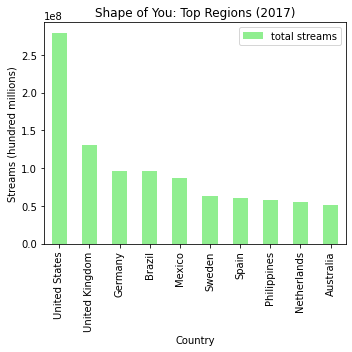

In [34]:
#create bar plot to show top 10 countries streams 
shape_bar = shape_top.plot.bar(x='region', y='total streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

#add title
plt.title("Shape of You: Top Regions (2017)")

#label xaxis
plt.xlabel("Country")

#lable yaxis
plt.ylabel("Streams (hundred millions)")

# top_countries_plot.bar_label(top_countries["total streams"], label_type='edge')

#adjust graph layout 
plt.tight_layout()

#export chart to pngs
plt.savefig("Shape_Top_Ten_Countries.png")

#show graph 
plt.show()   

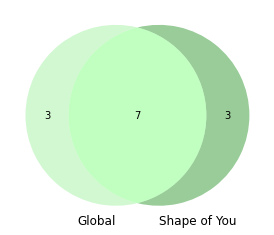

In [35]:
# # top_ten.compare(shape_top)
# top_ten.compare(shape_top,keep_shape=True, keep_equal=True)
venn2([set(top_ten.index), 
       set(shape_top['region'].to_list())],
       set_labels=('Global', 'Shape of You'),
       set_colors=('lightgreen', 'green'),
     )

In [36]:
artists_expanded_df = chart_data.assign(artist=chart_data.artist.str.split(',')).explode('artist')
artist = artists_expanded_df[(artists_expanded_df["region"] == "Global")]
artist_sum = artist["total streams"].groupby(artist["artist"]).sum()
sum_stat = pd.DataFrame({"Total streams":artist_sum})
global_sorted = sum_stat.sort_values("Total streams", ascending = False)
global_fifty = global_sorted.head(50)
global_ten = global_sorted.head(10)
global_ten

,Total streams
artist,
Post Malone,1.410898e+10
Ed Sheeran,1.310966e+10
Drake,1.068179e+10
Billie Eilish,9.886984e+09
Ariana Grande,8.698247e+09
The Weeknd,7.469300e+09
J Balvin,7.398034e+09
Bad Bunny,7.373682e+09
XXXTENTACION,6.879441e+09


In [37]:
# # t test
# result = shape_percent.drop('Sweden')
# result = shape_percent.drop('Philippines')
# result = shape_percent.drop('Netherlands')
# result
# # observed = pd.Series(shape_decimal)
# # # Create a data frame
# # df = pd.DataFrame([observed]).T
# # # Add a column whose default values are the expected values
# # df[1] = top_ten_decimal
# # # df_percent = df['expected'].fillna(0)
# # # df_percent
# # # Rename columns
# # df.columns = ["observed", "expected"]
# # # df_top_c = df.drop(df.index[[5,7,8]])
# # # df_top_c
# # df
# # The degree of freedom is 68-1 = 67
# # With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
# critical_value = stats.chi2.ppf(q = 0.95, df = 67)
# critical_value
# # Run the chi square test with stats.chisquare()
# # stats.chisquare(df['observed'], df['expected'])
# type (shape_percent)